# Exercise 4 - Similar Products Recommender

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


# Fungsi untuk visualisasi data sebagai tabel di jupyter notebook
def display_data_as_table(data, headers=[]):
    if len(headers) == 0:
        headers = ["Product ID", "Harga", "View", "Terbeli", "Rating"] 

    html_string = """
    <table>
        <thead>
            <tr>
                <th>%s</th>
            </tr>
        </thead>
        <tbody>
            <tr>%s</tr>
        </tbody>
    </table>
    """ % ("</th><th>".join(header for header in headers),
           "</tr><tr>".join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))

    return display(HTML(html_string))


## Studi Kasus

Perusahaan XYZ berencana untuk mengembangkan fitur baru yaitu sebuah mesin recommender sederhana yang mampu merekomendasikan produk mirip berdasarkan atribut - atribut yang dimiliki oleh produk tersebut.

Anda telah diberikan sebuah database yang memuat informasi semua produk dan tersimpan dalam satu CSV file.
File ini dapat anda temukan di `files/dummy_product_data.csv`.
Data yang ada dalam file tersebut terdiri dari 100 records masing - masing untuk satu jenis produk, dan 5 kolom yaitu:

- Kolom 0: product ID
- Kolom 1: harga produk
- Kolom 2: Jumlah user views untuk produk tersebut
- Kolom 3: Jumlah terbeli
- Kolom 4: Rating produk

Ikuti langkah - langkah di bawah ini untuk membangun recommender tersebut tahap demi tahap.

## Load the Data

In [2]:
# gunakan fungsi np.loadtxt untuk membaca file csv
def load_data(csv_file):
    return np.loadtxt(csv_file, delimiter=',')


In [3]:
# cek apakah data sudah diload dengan benar
raw_data = load_data('files/dummy_product_data.csv')
display_data_as_table(raw_data[:10])

## Feature Selection

Sebagai percobaan pertama, kita akan menggunakan dua atribut terlebih dahulu, yaitu View dan Rating.
Selain itu, dolom Product ID tidak akan kita gunakan dalam perhitungan selanjutnya, sehingga bisa kita hilangkan.

In [6]:
# pilih kolom yang akan kita proses berikutnya
data = raw_data[:, [1, 4]]
display_data_as_table(data[0:5], headers=["Harga", "Rating"])

## Data Scaling

Seperti yang bisa kita lihat dari data tersebut, masing - masing kolom memiliki rentang nilai yang berbeda - beda.
Kondisi ini sangat umum ditemui pada data di dunia nyata, tetapi bisa berpotensi menyebabkan masalah kemudian.
Sebagai contoh, kolom dengan rentang data yang kecil bisa jadi memiliki kontribusi yang kecil dalam pengambilan keputusan dibandingkan dengan kolom lain.
Sedangkan kolom dengan rentang nilai yang sangat besar bisa menyebabkan efek yang terlalu dominan sehingga mengabaikan kolom yang lain.
Idealnya kita perlu memastikan bahwa semua fitur (kolom) memiliki kontribusi yang proporsional.

Salah satu cara untuk memastikannya adalah dengan melakukan feature scaling [1].
Kita akan menskalakan ulang nilai - nilai pada semua kolom sehingga pada akhirnya nilainya memiliki rentang yang sama.

Langkahnya adalah sebagai berikut:
Untuk setiap kolom:
- Cari nilai minimum dan maksimum
- Ubah nilai ke rentang [0, 1] dengan menggunakan formula berikut:

$$
x^{\prime} = \frac{x - min}{max - min}
$$

In [7]:
def scaling(data):
    # 1. cari nilai minimum np.min()
    minimum = np.min(data, axis=0)
    # 2. cari nilai maximum np.max()
    maximum = np.max(data, axis=0)
    # 3. scale data
    # (100, 2) - (2) / (2) - (2)
    return (data - minimum) / (maximum - minimum)

# jalankan fungsi scaling kemudian tampilkan hasilnya
data = scaling(data)

In [8]:
# cek hasil scaling
display_data_as_table(data[:10], ["Harga", "Rating"])

Sekarang data anda sudah siap. HORE!.
Mari kita coba visualisasikan data tersebut.

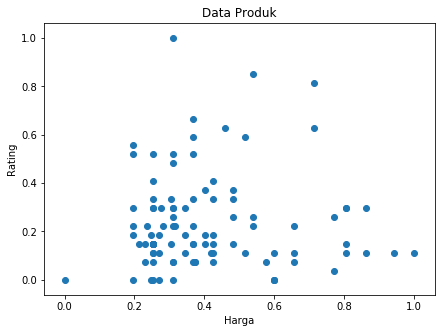

In [9]:
# tampilkan seluruh data dalam bentuk scatter plot
# x-axis: view
# y-axis: rating
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.title("Data Produk")
plt.xlabel("Harga")
plt.ylabel("Rating")
plt.show()

## Similarity vs Dissimilarity Metric

Karena kita akan membangun sebuah recommender yang berbasis pada kemiripan produk, maka kita memerlukan suatu metrik yang mengukur tingkat kemiripan antara dua produk.

Kali ini kita hanya akan mengulas dua macam metrik, yaitu Cosine similarity [2] dan Euclidean distance [3].
Cosine similarity mengukur tingkat kesamaan antara dua produk, sehingga dalam hal ini produk yang mirip akan memiliki nilai cosine similarity yang tinggi.
Sedangkan apabila menggunakan Euclidean distance, maka produk yang mirip akan memiliki nilai jarak yang kecil.

Selanjutnya anda akan diminta untuk menulis fungsi untuk menghitung Cosine similarity dan Euclidean distance.

### Euclidean Norm

Sebelum menghitung Cosine similarity ataupun Euclidean distance, kita perlu menghitung Euclidean norm.
Euclidean norm dari sebuah vektor $\boldsymbol{x}$ merepresentasikan jarak dari titik pusat koordinat 0 ke titik $\boldsymbol{x}$.
Euclidean norm didefinisikan secara matematis sebagai berikut:

$$
\left\| \boldsymbol{x} \right\| := \sqrt{x_{1}^{2} + \cdots + x_{n}^{2}}.
$$

Tulis fungsi untuk menghitung Euclidean norm dan pastikan fungsi anda menghasilkan perhitungan yang benar.
Anda dapat menguji fungsi anda dengan menggunakan sembarang vektor terlebih dahulu.

In [10]:
def calculate_norm(vector):
    # 1. hitung kuadrat elemen
    # 2. hitung sum seluruh elemen
    # 3. hitung akar kuadrat
    return np.sqrt(np.sum(np.square(vector)))


In [11]:
# untuk memastikan fungsi telah berjalan sesuai ekspektasi
# jalankan fungsi dengan data sembarang
x = np.array([3, 4])
calculate_norm(x)

5.0

### Euclidean Distance

![euclidean_distance](files/EuclideanDistanceGraphic_web.jpg)
*image from: [sloansportsconference.com](http://www.sloansportsconference.com/mit_news/using-spatial-analytics-to-study-spatio-temporal-patterns-in-sport-by-damien-demaj-geospatial-product-engineer-at-esri/)*

Euclidean distance antara titik $\boldsymbol{A}$ dan $\boldsymbol{B}$ adalah jarak garis lurus terdekat yang menghubungkan kedua titik tersebut, dan didefinisikan sebagai berikut.

$$
\mathrm{d}(\mathbf{A},\mathbf{B}) = \sqrt{\sum_{i=1}^n (A_{i} - B_{i})^2}
$$

Tulis fungsi untuk menghitung Euclidean distance dengan memanfaatkan fungsi norm yang telah anda tulis sebelumnya.

In [12]:
def calculate_euclidean_distance(vector1, vector2):
    # 1. diff = vector 1 - vector 2
    # 2. euclidean norm (diff)
    return calculate_norm(vector1 - vector2)



In [13]:
# untuk memastikan fungsi menghasilkan nilai sesuai ekspektasi
# jalankan fungsi dengan data sembarang
x1 = np.array([1, 10])
x2 = np.array([10, -1])
calculate_euclidean_distance(x1, x2)


14.212670403551895

### Cosine Similarity

![cosine_similarity](files/cosinesimilarityfq1.png)
*image from: http://blog.christianperone.com*

Cosine similarity mengukur cosine dari sudut yang dibentuk oleh dua buah vektor $\boldsymbol{A}$ dan $\boldsymbol{B}$.
Didefinisikan sebagai berikut:

$$
\text{similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf {A} \|_{2}\| \mathbf {B} \|_{2}} = \frac{\sum \limits _{i=1}^{n}A_{i}B_{i}}{\sqrt{\sum \limits _{i=1}^{n}A_{i}^2} \sqrt{\sum \limits _{i=1}^{n}B_{i}^2}}
$$

Nilai cosine similarity memiliki rentang dari -1 (sangat tidak mirip) hingga 1 (sangat mirip).

Gunakan fungsi yang sudah anda tulis sebelumnya untuk menulis fungsi perhitungan cosine similarity.

In [14]:
def calculate_cosine_similarity(vector1, vector2):
    # 1. numerator = dot product vector1 . vector 2
    numerator = np.dot(vector1, vector2)
    # 2. denominator = euclidean norm vector 1 x euclidean norm vector 2
    denominator = 0.000001 + calculate_norm(vector1) * calculate_norm(vector2)
    # 3. numerator / denominator
    return numerator / denominator


In [15]:
# jalankan fungsi dengan data sembarang
# untuk mengetest apakah sudah sesuai ekspektasi
x1 = np.array([0, 10])
x2 = np.array([0, 20])
calculate_cosine_similarity(x1, x2)

0.99999999500000003

In [16]:
print(calculate_cosine_similarity(x1, x2))
print(calculate_euclidean_distance(x1, x2))

0.999999995
10.0


## Calculating (dis)similarity between Products

Ini adalah bagian yang paling menarik.
Anda akan menghitung skor tingkat kesamaan antar produk untuk semua produk di database.
Skor inilah yang nanti akan digunakan untuk menentukan produk mana yang akan direkomendasikan.

Langkahnya adalah sebagai berikut: Untuk setiap produk, hitung skor similarity produk tersebut dengan produk lainnya yang ada di database, bisa menggunakan Euclidean distance atau cosine similarity.
Simpan hasilnya di sebuah matrik $N \times N$, dimana $N$ adalah jumlah produk yang ada di database.

In [17]:
def calculate_similarity(data):
    # 1. buat matrix NxN dengan seluruh nilai = 0
    n = data.shape[0]
    similarity_matrix = np.zeros((n, n))
    # 2. untuk setiap kombinasi produk i dan produk j, hitung similarity dengan fungsi sebelumnya
    for i in range(n):
        for j in range(n):
            vector1 = data[i, :]
            vector2 = data[j, :]
            # distance = calculate_euclidean_distance(vector1, vector2)
            # similarity_matrix[i, j] = distance
            sim = calculate_cosine_similarity(vector1, vector2)
            similarity_matrix[i, j] = sim
    
    return similarity_matrix
        
# jalankan fungsi untuk menghitung seluruh nilai similarity
similarity_matrix = calculate_similarity(data)

In [18]:
similarity_matrix

array([[ 0.99999565,  0.82459263,  0.91838545, ...,  0.78848007,
         0.74493823,  0.99562693],
       [ 0.82459263,  0.99998689,  0.98112946, ...,  0.99812636,
         0.99167205,  0.87380797],
       [ 0.91838545,  0.98112946,  0.99998511, ...,  0.96749167,
         0.94809942,  0.95131439],
       ..., 
       [ 0.78848007,  0.99812636,  0.96749167, ...,  0.99999864,
         0.99769222,  0.84246073],
       [ 0.74493823,  0.99167205,  0.94809942, ...,  0.99769222,
         0.9999856 ,  0.80396956],
       [ 0.99562693,  0.87380797,  0.95131439, ...,  0.84246073,
         0.80396956,  0.99999429]])

## Recommender Engine

Setelah kita memiliki skor matrik $N \times N$, kita dapat menggunakan skor tersebut untuk mencari produk yang akan direkomendasikan ketika diberikan suatu input berupa produk ID.
Yang perlu anda lakukan adalah dengan melihat skor pada baris di mana produk ID sebagai input, kemudian urutkan skor - skor tersebut sehingga kita bisa melihat produk - produk dengan tingkat kemiripan tinggi ke rendah.

Perlu diingat bahwa jika anda menggunakan Euclidean distance, maka anda produk dengan nilai terkecil lah yang memiliki tingkat kemiripan paling tinggi.

Tulis sebuah fungsi yang menerima input berupa produk ID dan akan  daftar produk ID yang paling direkomendasikan mirip dengan produk input.
Bandingkan hasilnya jika anda menggunakan Euclidean distance dengan Cosine similarity.

In [19]:
def recommend(product_id, similarity_matrix):
    # 1. cari baris dengan index == produk_id
    vector1 = similarity_matrix[product_id, :]
    # 2. urutkan nilai seluruh kolom pada baris tersebut
    row_with_index = [(i, element) for i, element in enumerate(vector1)]
    similar_products = sorted(row_with_index, key=lambda tup: -tup[1])
    # 3. kembalikan top n results
    return similar_products[:15]

In [20]:
result = recommend(15, similarity_matrix)
result

[(4, 0.99998835773144201),
 (9, 0.99998835773144201),
 (15, 0.99998835773144201),
 (43, 0.99998835773144201),
 (57, 0.99998835773144201),
 (68, 0.99998835773144201),
 (89, 0.99998835773144201),
 (58, 0.99990065221470559),
 (71, 0.99930490547095208),
 (85, 0.99930241650655793),
 (63, 0.99908440544327259),
 (38, 0.99746836700928232),
 (90, 0.99723158576108317),
 (21, 0.99700614057911474),
 (2, 0.99690348522103966)]

## Questions

1) Apa kelebihan dan kekurangan masing - masing metric ? Pada kasus apa sebaiknya menggunakan Euclidean dan Cosine similarity?

2) Similarity matrix yang telah kita buat berukuran $N \times N$, dimana $N$ adalah jumlah produk.
Apabila N sangat besar, maka ukuran similarity matrix pun juga akan menjadi sangat besar dan bahkan kadang tidak mungkin untuk disimpan dalam memori komputer kita.
Bagaimana strategi untuk mengatasi hal ini?

## References

[1] Feature scaling. (2017, May 6). In Wikipedia, The Free Encyclopedia. Retrieved 18:04, May 6, 2017, from https://en.wikipedia.org/w/index.php?title=Feature_scaling&oldid=779001894

[2] Cosine similarity. (2017, April 20). In Wikipedia, The Free Encyclopedia. Retrieved 18:18, May 6, 2017, from https://en.wikipedia.org/w/index.php?title=Cosine_similarity&oldid=776342338

[3] Euclidean distance. (2017, May 1). In Wikipedia, The Free Encyclopedia. Retrieved 18:18, May 6, 2017, from https://en.wikipedia.org/w/index.php?title=Euclidean_distance&oldid=778194104